In [256]:

##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

In [266]:
## Read file and then sort 
csv_file = "companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date","Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
print(len(companies_df.index))
companies_df.head(5)


8664


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,#waywire,https://www.crunchbase.com/organization/waywire,"Media and Entertainment, Government and Milita...","New York, New York, United States",#waywire is an online community focused on soc...,"21,987",2012-06-01,NaT,1,2012-06-30,1750000,Seed,1750000,Was Acquired
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,"Science and Engineering, Hardware, Data and An...","New York, New York, United States","GramLabs is a start up, leveraging deep learni...","11,897",2015-08-01,NaT,1,2016-07-27,1000000,Seed,1000000,Operating
2,.io,https://www.crunchbase.com/organization/io-rea...,Data and Analytics,"Alexandria, Virginia, United States",.io is a real-time intelligence platform.,"16,844",2015-03-01,NaT,1,2015-10-01,1500000,Seed,1500000,Operating
3,/dev/color,https://www.crunchbase.com/organization/dev-color,NaN,"Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"35,003",2015-05-01,NaT,1,2016-08-23,120000,Seed,120000,Operating
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,"Software, Professional Services","San Francisco, California, United States",10by10 builds a marketplace to more quickly ma...,"59,822",2015-01-01,NaT,1,2017-07-01,120000,Seed,120000,Operating


In [267]:
companies_df.columns

Index(['Company Name', 'Company Name URL', 'Category Groups',
       'Headquarters Location', 'Description', 'Crunchbase Rank',
       'Founded Date', 'Closed Date', 'Number of Funding Rounds',
       'Last Funding Date', 'Last Funding Amount', 'Last Funding Type',
       'Total Funding Amount', 'Status'],
      dtype='object')

In [269]:
companies_df.dtypes

Company Name                        object
Company Name URL                    object
Category Groups                     object
Headquarters Location               object
Description                         object
Crunchbase Rank                     object
Founded Date                datetime64[ns]
Closed Date                 datetime64[ns]
Number of Funding Rounds             int64
Last Funding Date           datetime64[ns]
Last Funding Amount                  int64
Last Funding Type                   object
Total Funding Amount                 int64
Status                              object
dtype: object

In [270]:
companies_df = companies_df[["Company Name", "Founded Date", "Closed Date", "Number of Funding Rounds", "Last Funding Date", "Last Funding Amount", "Total Funding Amount", "Status"]]
companies_df.head()

,Company Name,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating


In [271]:
companies_pf = companies_df.rename(columns={
    "Company Name" : "Company",
    "Number of Funding Rounds" : "Funding Rounds"   
})

companies_pf.head()

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating


In [285]:
## Read file and then sort 
funding = "Funding_Rounds.csv"
funding_df = pd.read_csv(funding, encoding="iso-8859-1")
funding_df.head(20)



,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,TestMetal,https://www.crunchbase.com/organization/testmetal,Series A,690000,7/10/15
1,WinApp Inc,https://www.crunchbase.com/organization/winapp...,Seed,2000000,10/30/15
2,Cambly,https://www.crunchbase.com/organization/cambly,Seed,7000000,9/1/16
3,Goboxi,https://www.crunchbase.com/organization/goboxi,Seed,3000000,12/6/13
4,KaChing!,https://www.crunchbase.com/organization/kachin...,Seed,30000000,2/24/17
5,Antag Therapeutics,https://www.crunchbase.com/organization/antag-...,Seed,20000000,7/3/17
6,Royole Corporation,https://www.crunchbase.com/organization/royole...,Series D,400000000,5/10/17
7,Vinci,https://www.crunchbase.com/organization/vinci-2,Series A,35000000,9/1/16
8,SV Insight,https://www.crunchbase.com/organization/sv-ins...,Seed,10000000,3/15/17
9,import.io,https://www.crunchbase.com/organization/importio,Seed,600000,3/22/13


In [286]:
funding_df.dtypes

Company Name         object
Company Name URL     object
Funding Type         object
Money Raised          int64
Announced On Date    object
dtype: object

In [287]:
funding_df = funding_df[["Company Name", "Funding Type", "Money Raised", "Announced On Date"]]
funding_df.head()

,Company Name,Funding Type,Money Raised,Announced On Date
0,TestMetal,Series A,690000,7/10/15
1,WinApp Inc,Seed,2000000,10/30/15
2,Cambly,Seed,7000000,9/1/16
3,Goboxi,Seed,3000000,12/6/13
4,KaChing!,Seed,30000000,2/24/17


In [288]:
funding_pf = funding_df.rename(columns={
    "Company Name" : "Company"
})

funding_pf.head()

,Company,Funding Type,Money Raised,Announced On Date
0,TestMetal,Series A,690000,7/10/15
1,WinApp Inc,Seed,2000000,10/30/15
2,Cambly,Seed,7000000,9/1/16
3,Goboxi,Seed,3000000,12/6/13
4,KaChing!,Seed,30000000,2/24/17


In [379]:
merged_data = pd.merge(companies_pf, funding_pf,how="inner",on="Company")
merged_data.head(50)



,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,7/27/16
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,10/1/15
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,8/23/16
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,7/1/17
5,10-4 Systems,2012-01-01,NaT,1,2016-06-27,13900000,13900000,Operating,Series A,13900000,6/27/16
6,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series C,55000000,3/17/16
7,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series B,55000000,1/12/15
8,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series A,3000000,10/8/12
9,10sec,2013-07-08,NaT,2,2014-05-08,1600000,1600000,Operating,Seed,1600000,5/8/14


In [380]:
merged_data.to_csv("Homepage_Output.csv")

In [363]:
merged_data.columns

Index(['Company', 'Founded Date', 'Closed Date', 'Funding Rounds',
       'Last Funding Date', 'Last Funding Amount', 'Total Funding Amount',
       'Status', 'Funding Type', 'Money Raised', 'Announced On Date'],
      dtype='object')

In [366]:
type(merged_data['Announced On Date'].values[0])

str

In [367]:
merged_data['Announced On Date'].values[0]

'6/30/12'

In [373]:
# convert sting to datetime

from datetime import datetime

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object = datetime.strptime('6/30/12', '%m/%d/%y')

In [374]:
datetime_object

datetime.datetime(2012, 6, 30, 0, 0)

In [375]:
merged_data['Announced On Date Converted'] = merged_data['Announced On Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

In [376]:
merged_data.head()

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,Announced On Date Converted
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12,2012-06-30
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,7/27/16,2016-07-27
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,10/1/15,2015-10-01
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,8/23/16,2016-08-23
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,7/1/17,2017-07-01


In [290]:
## Read file and then sort 
org = "organizations.csv"
org_df = pd.read_csv(org, encoding="iso-8859-1")
org_df.head(5)                              

,crunchbase_uuid,type,primary_role,name,crunchbase_url,homepage_domain,homepage_url,profile_image_url,facebook_url,twitter_url,linkedin_url,stock_symbol,location_city,location_region,location_country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Organization,company,Wetpaint,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://www.crunchbase.com/organization/wetpai...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,https://www.linkedin.com/company/wetpaint,:,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Organization,company,Zoho,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com/,https://www.crunchbase.com/organization/zoho/p...,http://www.facebook.com/zoho,http://twitter.com/zoho,http://www.linkedin.com/company/zoho-corporati...,:,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Organization,company,Digg,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://www.crunchbase.com/organization/digg/p...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,:,New York,New York,USA,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Organization,investor,Omidyar Network,https://www.crunchbase.com/organization/omidya...,omidyar.com,http://www.omidyar.com,https://www.crunchbase.com/organization/omidya...,http://www.facebook.com/OmidyarNetwork,http://twitter.com/OmidyarNetwork,http://www.linkedin.com/company/22806,:,Redwood City,California,USA,Omidyar Network is an investment firm.
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Organization,company,Facebook,https://www.crunchbase.com/organization/facebo...,facebook.com,http://www.facebook.com,https://www.crunchbase.com/organization/facebo...,https://www.facebook.com/facebook/,https://twitter.com/facebook,http://www.linkedin.com/company/facebook,NASDAQ:FB,Menlo Park,California,USA,Facebook is an online social networking servic...


In [235]:
# Rename columns for readability
new_file = org_df.rename(columns={
    "crunchbase_uuid": "UUID",
    "name" : "Company",
    "homepage_url" : "Homepage"   
})

new_file.head()

,UUID,type,primary_role,Company,crunchbase_url,homepage_domain,Homepage,profile_image_url,facebook_url,twitter_url,linkedin_url,stock_symbol,location_city,location_region,location_country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Organization,company,Wetpaint,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://www.crunchbase.com/organization/wetpai...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,https://www.linkedin.com/company/wetpaint,:,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Organization,company,Zoho,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com/,https://www.crunchbase.com/organization/zoho/p...,http://www.facebook.com/zoho,http://twitter.com/zoho,http://www.linkedin.com/company/zoho-corporati...,:,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Organization,company,Digg,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://www.crunchbase.com/organization/digg/p...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,:,New York,New York,USA,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Organization,investor,Omidyar Network,https://www.crunchbase.com/organization/omidya...,omidyar.com,http://www.omidyar.com,https://www.crunchbase.com/organization/omidya...,http://www.facebook.com/OmidyarNetwork,http://twitter.com/OmidyarNetwork,http://www.linkedin.com/company/22806,:,Redwood City,California,USA,Omidyar Network is an investment firm.
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Organization,company,Facebook,https://www.crunchbase.com/organization/facebo...,facebook.com,http://www.facebook.com,https://www.crunchbase.com/organization/facebo...,https://www.facebook.com/facebook/,https://twitter.com/facebook,http://www.linkedin.com/company/facebook,NASDAQ:FB,Menlo Park,California,USA,Facebook is an online social networking servic...


In [291]:
new_file = new_file[["UUID", "Company", "Homepage"]]
new_file.head()





,UUID,Company,Homepage
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,http://www.wetpaint.com/
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,https://www.zoho.com/
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,http://www.digg.com
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,http://www.omidyar.com
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,http://www.facebook.com


In [237]:

new_file.to_csv("Org_Output.csv")

In [292]:
merged_df = pd.merge(merged_data, new_file,how="inner",on="Company")
merged_df.head()

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,7/27/16,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,10/1/15,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,8/23/16,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,7/1/17,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/


In [239]:
# didn't work
# merged_pf = merged_df["UUID"].replace("-", "")
# merged_pf.head()


In [240]:
# didn't work
# merged_df["UUID"].replace("-", "", inplace=True)

In [241]:
# didn't work BUT replaces dashes but doesn't replace the value
# merged_df['UUID'].apply(lambda x: x.replace("-", ""))
# print('done')

In [242]:
# works
for i, el in enumerate(merged_df.iterrows()):
    val = el[1]['UUID'].replace("-", "")
    merged_df.set_value(i, "UUID", val)

In [243]:
# check if dashes are gone in UUID column
merged_df.head()['UUID']

0    3ca068193ca9ce42ce20f0e150d563a0
1    18e8dd5efe1d5f8ef2edb254171d7f5d
2    cf169e68c903c0898789bdd557d6a4c1
3    165f412c361d7931fd3bcf5e2a1ccef3
4    e1670a304ff5893d0ae3ceb761e1c251
Name: UUID, dtype: object

In [293]:
merged_df.head(50)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,7/27/16,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,10/1/15,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,8/23/16,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,7/1/17,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/
5,10-4 Systems,2012-01-01,NaT,1,2016-06-27,13900000,13900000,Operating,Series A,13900000,6/27/16,35ca612c-f370-d2df-e3db-63554192f84a,https://www.10-4.com/
6,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series C,55000000,3/17/16,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,http://10xgenomics.com
7,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series B,55000000,1/12/15,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,http://10xgenomics.com
8,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series A,3000000,10/8/12,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,http://10xgenomics.com
9,10sec,2013-07-08,NaT,2,2014-05-08,1600000,1600000,Operating,Seed,1600000,5/8/14,79fd01f6-8873-6282-a9ea-27622d0bbdcb,https://10s.ec/


In [340]:
'a' in ['a', 'b', 'c']

True

In [341]:
'd' in ['a', 'b', 'c']

False

In [359]:
#funding = merged_df.groupby('Company')["Funding Type"].value_counts()
funding_df = merged_df[merged_df['Company'] == "Seed"]
#funding_df = funding[funding['Funding Type'] == "Seed"]
funding_df.head(100)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage


In [294]:

merged_df.dtypes

Company                         object
Founded Date            datetime64[ns]
Closed Date             datetime64[ns]
Funding Rounds                   int64
Last Funding Date       datetime64[ns]
Last Funding Amount              int64
Total Funding Amount             int64
Status                          object
Funding Type                    object
Money Raised                     int64
Announced On Date               object
UUID                            object
Homepage                        object
dtype: object

In [333]:
status = merged_df.groupby('Funding Type')["Status"].value_counts()

#g1 = df1.groupby(["Name", "City"], as_index=False).count()

status.head(10)

Funding Type  Status      
Seed          Operating       5434
              Was Acquired     371
              Closed           222
              IPO                3
Series A      Operating       2594
              Was Acquired     203
              Closed            51
              IPO               16
Series B      Operating        953
              Was Acquired      65
Name: Status, dtype: int64

In [336]:
df1 = pd.DataFrame(status).rename(columns={
    'Status': 'Count'})

df1.head(100)

Count
Funding Type Status             
Seed         Operating      5434
             Was Acquired    371
             Closed          222
             IPO               3
Series A     Operating      2594
             Was Acquired    203
             Closed           51
             IPO              16
Series B     Operating       953
             Was Acquired     65
             IPO              15
             Closed           13
Series C     Operating       264
             Was Acquired     13
             IPO               2
Series D     Operating        57
             Was Acquired      2

In [361]:
series_d = merged_df[merged_df['Funding Type'] == "Series D"]
series_d

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
79,908 Devices,2012-01-01,NaT,5,2017-03-15,20000000,49300000,Operating,Series D,20000000,3/15/17,9c3b4ae4-72af-b6d6-3f02-9c811f56fb40,http://908devices.com
421,Alector,2013-01-01,NaT,3,2016-01-07,29500000,61500000,Operating,Series D,29500000,1/7/16,9dd3b221-ff3b-bdb8-34da-7774e6510b63,http://alector.com
932,AveXis,2013-01-01,NaT,4,2015-09-08,65000000,75000000,Was Acquired,Series D,65000000,9/8/15,b09be91c-91a9-632e-870d-c5ed83c46717,https://avexis.com/
1319,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,8/24/17,e35a34d3-6b1d-1d5b-1665-190c7daa4460,http://www.blendsd.com
1320,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,8/24/17,5058d5cd-4c08-c241-1659-23dec5136c9d,https://www.blend.com
1321,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,8/24/17,a2c48634-a8fd-8030-f6a1-306cf29d50ff,http://www.blend.life
1647,Bustle Digital Group,2013-01-01,NaT,5,2017-03-10,12000000,50500000,Operating,Series D,12000000,3/10/17,b7d88b9f-3a74-6aea-8451-59ecd4851518,http://bustle.com
1831,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,6/27/17,45a8a2d2-d13f-b336-348a-2b0bc1a80b01,http://www.gocatalant.com
1832,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,6/27/17,9b67b0f7-b229-dcf6-3a1b-b4ecc971ce14,http://catalant.co
2060,CloudHealth Technologies,2012-01-01,NaT,5,2017-06-27,46000000,85700000,Operating,Series D,46000000,6/27/17,1ea93e4f-355c-999b-a61d-96482d7e42ee,http://www.cloudhealthtech.com


In [360]:
funding_df = merged_df[merged_df['Funding Type'] == "Seed"]
funding_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,7/27/16,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,10/1/15,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,8/23/16,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,7/1/17,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/
9,10sec,2013-07-08,NaT,2,2014-05-08,1600000,1600000,Operating,Seed,1600000,5/8/14,79fd01f6-8873-6282-a9ea-27622d0bbdcb,https://10s.ec/
10,12 Labs,2014-08-01,NaT,1,2014-11-26,935000,935000,Operating,Seed,935000,11/26/14,74a66ef3-58d3-adec-5740-ae7794dd6dbd,http://www.getapplause.com/
11,121 Mobile,2012-02-17,NaT,4,2015-12-18,2200000,4000000,Operating,Seed,2200000,12/18/15,8d43a7ef-ac3c-3977-c8d7-b62377f1d97a,http://my121mobile.com
15,128 Technology,2014-07-07,NaT,4,2017-05-31,21500000,57499347,Operating,Seed,4000000,7/7/14,b87dd21c-6fbd-9c7d-43ee-3ce97387825e,https://www.128technology.com/
17,17hats,2014-01-01,NaT,2,2015-10-15,4000000,5250000,Operating,Seed,1250000,2/18/15,c852c5d3-220d-2eb6-c78e-3c9148430ce4,https://www.17hats.com


In [328]:
seed = merged_df[merged_df['Status'] == "Was Acquired"].count
seed_df = merged_df[merged_df['Funding Type'] == "Seed"]

seed_df = seed_df[seed_df['Status'] == "Was Acquired"]

seed_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,6/30/12,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
97,ADSHIFT,2013-01-01,NaT,1,2016-02-23,650000,650000,Was Acquired,Seed,650000,2/23/16,360b3ff4-56ea-7268-78f6-c01978e94f60,https://adshift.com/
165,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,12/25/13,def201e8-3bc9-7dff-e764-10a6371121eb,http://abakus.me
166,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,12/25/13,7e5d80ed-e34c-3c4b-c34c-0099b4c5ea4f,http://www.abakus.com
167,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,425000,7/11/14,746e8b91-8c67-072a-b071-8695a540b4e4,http://abbeypost.com
168,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,225000,4/6/14,746e8b91-8c67-072a-b071-8695a540b4e4,http://abbeypost.com
169,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,100000,1/30/14,746e8b91-8c67-072a-b071-8695a540b4e4,http://abbeypost.com
170,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,25000,7/30/13,746e8b91-8c67-072a-b071-8695a540b4e4,http://abbeypost.com
217,Acquaintable,2012-01-01,NaT,1,2013-01-07,40000,40000,Was Acquired,Seed,40000,1/7/13,f75d1018-5b16-b32c-ef91-09c7bcd44341,http://acquaintable.com
225,ActionX,2012-01-01,NaT,2,2013-09-16,3000000,5000000,Was Acquired,Seed,2000000,3/1/12,b4c2c24d-cdc1-6665-9e54-1e593f695085,http://actionx.com


In [326]:
# Build a scatter plot for each data type
plt.scatter(seed_df["Funding Type"], 
            seed_df["Status"],
            s=100, edgecolor="black", linewidths=1, c="red", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Seed Funding Type Status")
plt.ylabel("Funding Type")
plt.xlabel("Status")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

ValueError: could not convert string to float: 'Was Acquired'

In [310]:
#seed = merged_df[merged_df['Status'] == "Operating"]
seed = merged_df[merged_df['Status'] == "Was Acquired"]
seed = merged_df[merged_df['Status'] == "Closed"]
seed = merged_df[merged_df['Status'] == "IPO"]

# # x-axis
seed_operating = seed.groupby(["Status"]).count()["Closed"]
# #y-axis
seed_acquired = seed.groupby(["Status"]).count()["Was Acquired"]

# # x-axis
seed_closedt = seed.groupby(["Status"]).count()["Closed"]
# #y-axis
seed_ips = seed.groupby(["Status"]).count()["IPO"]

# # # x-axis
# rural_ride_count = rural_cities.groupby(["city"]).count()["fare"]
# # #y-axis
# rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# # # x-axis
# suburban_ride_count = suburban_cities.groupby(["city"]).count()["fare"]
# # #y-axis
# suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [298]:
funding_sum = merged_df.groupby('Funding Type')["Money Raised"].sum()
funding_sum.head(10)

Funding Type
Seed         7779876098
Series A    28365357631
Series B    24141335760
Series C    12869981307
Series D     4330750000
Name: Money Raised, dtype: int64

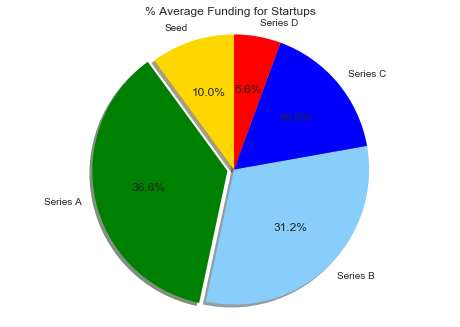

In [301]:
fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
#numbers = [6030, 2864, 59, 1046, 279,]
numbers = funding_sum
colors = ["gold", "green", "lightskyblue", "blue", "red"]
explode = (0, 0.05, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Average Funding for Startups")
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

In [247]:
funding_avg = merged_df.groupby('Funding Type')["Money Raised"].count()
funding_avg.head()


Funding Type
Seed        6030
Series A    2864
Series B    1046
Series C     279
Series D      59
Name: Money Raised, dtype: int64

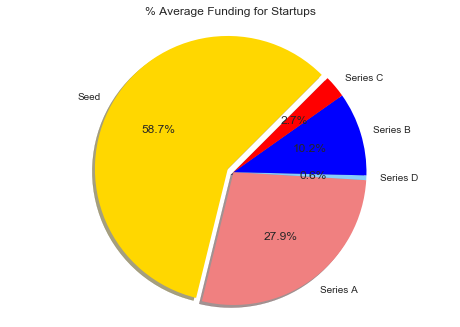

In [303]:
fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A","Series D", "Series B", "Series C", ]
numbers = [6030, 2864, 59, 1046, 279,]
#numbers = funding_avg
colors = ["gold", "lightcoral", "lightskyblue", "blue", "red"]
explode = (0.05, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Average Funding for Startups")
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=45)
ax.axis("equal")

plt.show()

In [249]:
# funds_pd = fund_df.rename(columns={
#     "uuid": "UUID"   
# })

# funds_pd.head()